In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
%load_ext autoreload # magic function used to reload the imported package after edit without restarting the kernel
%autoreload 2
%matplotlib inline

In [41]:
data = pd.read_csv('data/iris/iris.data',header=None)

In [24]:
%magic # to print all the magic function

In [42]:
sns.set()

In [43]:
print(data.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [44]:
# lets add header to the data
column_names = [
    'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'
]

data.columns = column_names

In [45]:
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [46]:
# now lets create training set with features as 'X' and target as 'y'
# and let's also change target to values form 0 to 2
data['species'] = data['species'].map({
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
})

In [47]:
X = data.drop(columns=['species']) # features
y = data['species']

In [48]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [49]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


# What problem are we trying to solve?
we are trying to use attributes of flowers to predict the species of the flower. specially we are trying to use the sepal length and width,
petal length and width to predict if iris flower is of type Setosa, Versicolor or Virginica

This is a multiclass classification problem

In [50]:
data.describe()

sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000

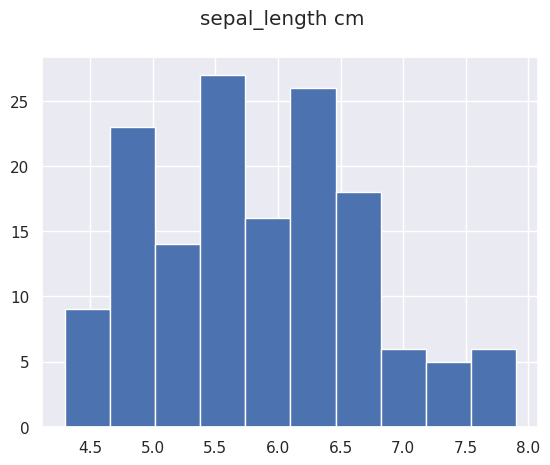

In [54]:
# now let's plot data
col = 'sepal_length'
data[col].hist()
plt.suptitle(f'{col} cm')
plt.show()

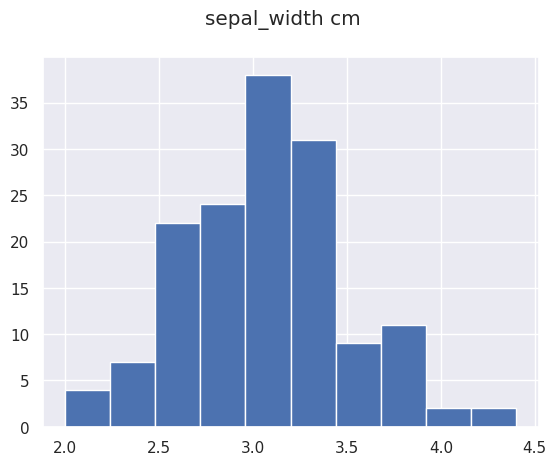

In [55]:
col = 'sepal_width'
data[col].hist()
plt.suptitle(f'{col} cm')
plt.show()

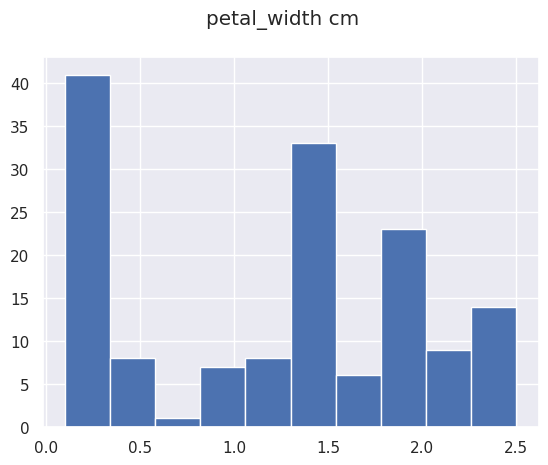

In [56]:
col = 'petal_width'
data[col].hist()
plt.suptitle(f'{col} cm')
plt.show()

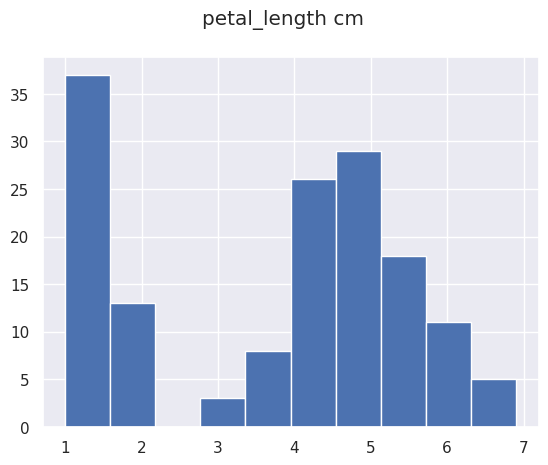

In [57]:
col = 'petal_length'
data[col].hist()
plt.suptitle(f'{col} cm')
plt.show()

# the above histograms are not needed
# we need to find relationship of the data features with the target

In [59]:
sns.relplot? # to see its properties

In [62]:
data['target_names'] = data['species'].map({
     0 : 'Iris-setosa',
     1 : 'Iris-versicolor',
     2 : 'Iris-virginica'
})

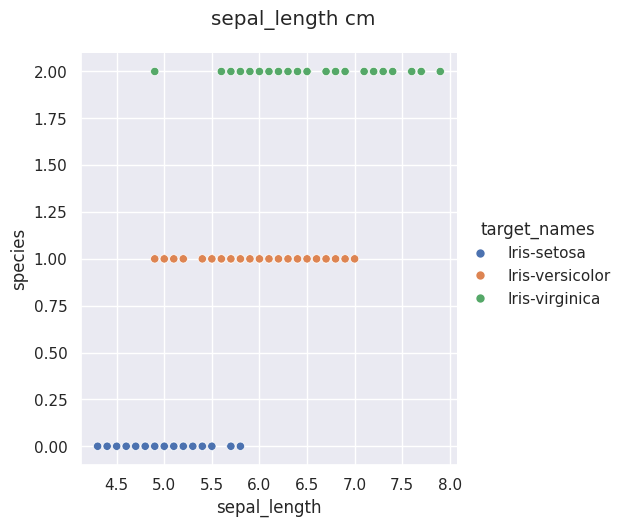

In [68]:
col = 'sepal_length'
sns.relplot(x=col,y='species',hue='target_names',data=data)
# plt.suptitle(f'{col} cm', y = 1.05)
# plt.show()
# or use throw_way variable 
_ = plt.suptitle(f'{col} cm', y = 1.05)

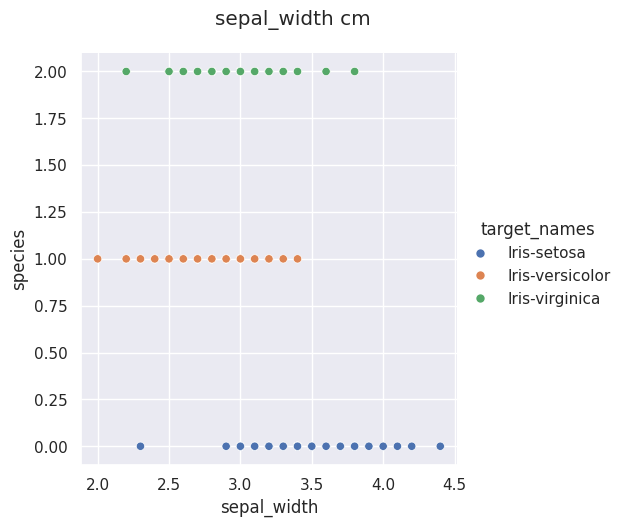

In [69]:
col = 'sepal_width'
sns.relplot(x=col,y='species',hue='target_names',data=data)
_ = plt.suptitle(f'{col} cm', y = 1.05)

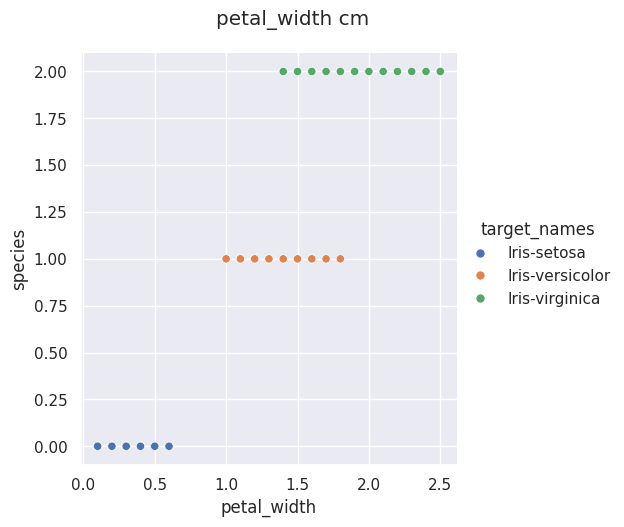

In [70]:
col = 'petal_width'
sns.relplot(x=col,y='species',hue='target_names',data=data)
_ = plt.suptitle(f'{col} cm', y = 1.05)

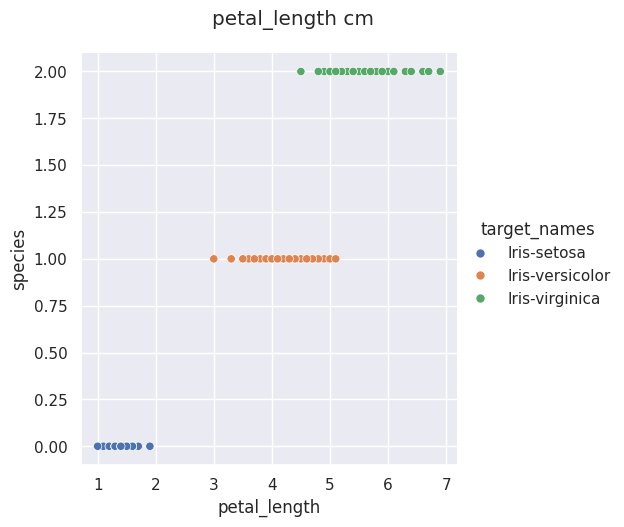

In [71]:
col = 'petal_length'
sns.relplot(x=col,y='species',hue='target_names',data=data)
_ = plt.suptitle(f'{col} cm', y = 1.05)

# Exploratory Data Analysis (EDA) - Pairplots

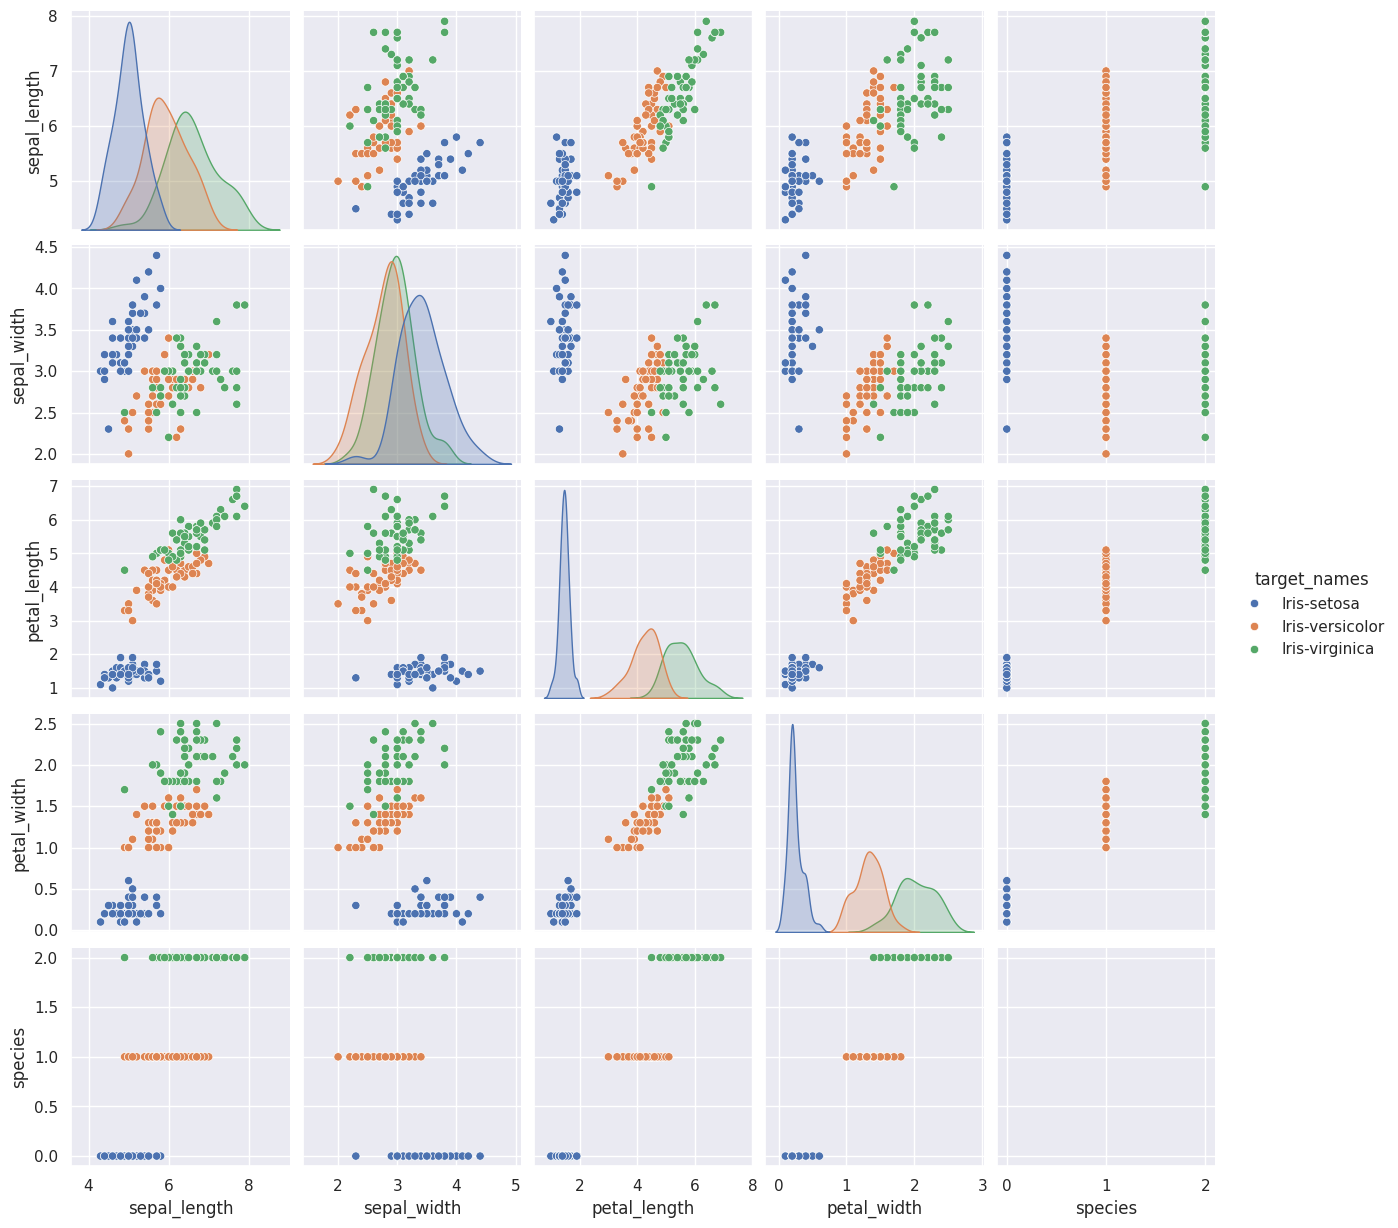

In [75]:
sns.pairplot(data, hue='target_names')

# Train Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
df_train, df_test = train_test_split(data, test_size=0.25)

In [78]:
df_train.shape

(112, 6)

In [79]:
df_test.shape

(38, 6)

In [80]:
df_train.head()

sepal_length  sepal_width  petal_length  petal_width  species  \
61           5.9          3.0           4.2          1.5        1   
51           6.4          3.2           4.5          1.5        1   
81           5.5          2.4           3.7          1.0        1   
96           5.7          2.9           4.2          1.3        1   
33           5.5          4.2           1.4          0.2        0   

       target_names  
61  Iris-versicolor  
51  Iris-versicolor  
81  Iris-versicolor  
96  Iris-versicolor  
33      Iris-setosa

# Prepare our data for modeling

This involves splitting the data back out into plain numpy arrays

In [84]:
X_train = df_train.drop(columns=['species','target_names']).values

In [85]:
X_train # values make it to numpy array

array([[5.9, 3. , 4.2, 1.5],
       [6.4, 3.2, 4.5, 1.5],
       [5.5, 2.4, 3.7, 1. ],
       [5.7, 2.9, 4.2, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5. , 3.6, 1.4, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [5. , 2. , 3.5, 1. ],
       [6.7, 3.3, 5.7, 2.1],
       [6.1, 2.9, 4.7, 1.4],
       [5.1, 3.4, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.9, 3. , 5.1, 1.8],
       [5.6, 2.7, 4.2, 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.6, 3. , 6.6, 2.1],
       [6.1, 2.8, 4.7, 1.2],
       [5.7, 4.4, 1.5, 0.4],
       [4.8, 3. , 1.4, 0.1],
       [5.4, 3. , 4.5, 1.5],
       [5.1, 3.8, 1.9, 0.4],
       [5.1, 3.8, 1.5, 0.3],
       [6.2, 2.8, 4.8, 1.8],
       [5.7, 3.8, 1.7, 0.3],
       [7.2, 3.2, 6. , 1.8],
       [5.6, 3. , 4.5, 1.5],
       [4.5, 2.3, 1.3, 0.3],
       [5.8, 2.7, 5.1, 1.9],
       [4.4, 3. , 1.3, 0.2],
       [7.7, 2.6, 6.9, 2.3],
       [6.3, 3.3, 6. , 2.5],
       [5.5, 2.6, 4.4, 1.2],
       [7.7, 2

In [86]:
X_train.shape

(112, 4)

In [88]:
y_train = df_train['species'].values

In [89]:
y_train.shape

(112,)

# Modeling - What is our baseline?
what is the simplest model we can think of?
In this case, if our baseline model is just randomly guessing the species of flower, or guessing a single species for every data point, we would expect to have a model accuracy of 0.33 , since we have 3 different classes are evenly balaced. so our model should be at least beat 33% accuracy

# lets create manual model using only one feature

In [91]:
petal_length_features = X_train[:,2] # first all the row : take second column values that is petal length

In [93]:
def single_feature_prediction(petal_length):
    """ Predicts the Iris species given the petal length."""
    if petal_length < 2.5:
        return 0
    elif petal_length < 4.8:
        return 1
    else:
        return 2

In [97]:
manual_y_predictions = np.array([single_feature_prediction(x) for x in petal_length_features])

In [99]:
manual_model_accuracy = np.mean(manual_y_predictions == y_train)

so the accuracy is 94% for manual model using only one feature

In [100]:
print(f"Manual model accuracy : {manual_model_accuracy * 100:.2f}%")

Manual model accuracy : 94.64%


# Logistic regression using sklearn

In [101]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

In [102]:
lr_model.fit(X_train, y_train)

LogisticRegression()

In [106]:
y_pred = lr_model.predict(X_train)

print(type(y_pred))

<class 'numpy.ndarray'>


In [107]:
logistic_regression_sklearn_accuracy = np.mean(y_pred == y_train)

In [108]:
print(f"Logistic regression sklearn model accuracy : {logistic_regression_sklearn_accuracy * 100:.2f}%")

Logistic regression sklearn model accuracy : 96.43%


In [110]:
print("Accuracy on training set:", lr_model.score(X_train, y_train)) # you never want to evaluate your model on the same data that was used for training

Accuracy on training set: 0.9642857142857143


In [111]:
X_test = df_test.drop(columns=['species','target_names']).values
y_pred_test_data = lr_model.predict(X_test)

In [112]:
y_pred_test_data

array([2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1, 2,
       2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0])

In [113]:
y_test = df_test['species'].values

In [114]:
accuracy_on_test_data = np.mean(y_pred_test_data == y_test)

In [115]:
print(f"Logistic regression sklearn model accuracy  on test data: {accuracy_on_test_data * 100:.2f}%")

Logistic regression sklearn model accuracy  on test data: 100.00%


In [116]:
y_test == y_pred_test_data

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [117]:
print("Accuracy on test set:", lr_model.score(X_test, y_test))

Accuracy on test set: 1.0


In [118]:
# Access the weights (coefficients) and bias
weights = lr_model.coef_
bias = lr_model.intercept_

# Print the weights and bias
print("Weights (coefficients):", weights)
print("Bias (intercept):", bias)


Weights (coefficients): [[-0.37021115  0.91123222 -2.33164082 -1.00334086]
 [ 0.40732694 -0.29312917 -0.15510248 -0.80990394]
 [-0.03711579 -0.61810305  2.48674331  1.8132448 ]]
Bias (intercept): [  8.90938188   2.33641773 -11.24579962]


If you're working with a multi-class classification problem, the coef_ will return a matrix of shape (n_classes, n_features) where each row corresponds to the coefficients for one class. The bias will also be a vector of shape (n_classes,).

# uisng cross-validation to evaluate the model

In [121]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [131]:
model = LogisticRegression(max_iter=200)

In [132]:
accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

In [133]:
accuracies

array([0.91304348, 0.91304348, 1.        , 0.90909091, 0.95454545])

In [134]:
np.mean(accuracies)

0.9379446640316207

# where are we misclassifying points?

In [135]:
y_pred_cross_valid = cross_val_predict(model, X_train, y_train, cv=5)

In [136]:
y_pred_cross_valid

array([1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1,
       0, 0, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       1, 2, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2,
       1, 0])

In [147]:
predicted_corrected_mask = y_pred_cross_valid == y_train

In [148]:
not_predicted_correctly = ~predicted_corrected_mask

In [150]:
y_train[not_predicted_correctly]

array([2, 2, 1, 1, 2, 2, 1])

In [151]:
X_train[not_predicted_correctly]

array([[4.9, 2.5, 4.5, 1.7],
       [6.2, 2.8, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [5.9, 3.2, 4.8, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 2.2, 5. , 1.5],
       [6. , 2.7, 5.1, 1.6]])

In [152]:
df_predictions = df_train.copy()

In [153]:
df_predictions["correct_predictions"] = predicted_corrected_mask

In [154]:
df_predictions["predictions"] = y_pred

In [155]:
df_predictions["prediction_label"] = df_predictions["predictions"].map({
     0 : 'Iris-setosa',
     1 : 'Iris-versicolor',
     2 : 'Iris-virginica'
})

In [156]:
df_predictions

sepal_length  sepal_width  petal_length  petal_width  species  \
61            5.9          3.0           4.2          1.5        1   
51            6.4          3.2           4.5          1.5        1   
81            5.5          2.4           3.7          1.0        1   
96            5.7          2.9           4.2          1.3        1   
33            5.5          4.2           1.4          0.2        0   
..            ...          ...           ...          ...      ...   
127           6.1          3.0           4.9          1.8        2   
54            6.5          2.8           4.6          1.5        1   
137           6.4          3.1           5.5          1.8        2   
55            5.7          2.8           4.5          1.3        1   
20            5.4          3.4           1.7          0.2        0   

        target_names  correct_predictions  predictions prediction_label  
61   Iris-versicolor                 True            1  Iris-versicolor  
51   Iris-versicolor                 True            1  Iris-versicolor  
81   Iris-versicolor                 True            1  Iris-versicolor  
96   Iris-versicolor                 True            1  Iris-versicolor  
33       Iris-setosa                 True            0      Iris-setosa  
..               ...                  ...          ...              ...  
127   Iris-virginica                 True            2   Iris-virginica  
54   Iris-versicolor                 True            1  Iris-versicolor  
137   Iris-virginica                 True            2   Iris-virginica  
55   Iris-versicolor                 True            1  Iris-versicolor  
20       Iris-setosa                 True            0      Iris-setosa  

[112 rows x 9 columns]

<Axes: xlabel='petal_length', ylabel='petal_width'>

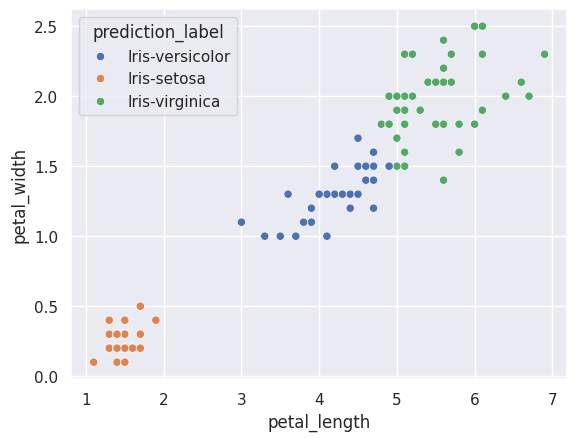

In [161]:
sns.scatterplot(x="petal_length",y="petal_width",data=df_predictions,hue="prediction_label")

<Axes: xlabel='petal_length', ylabel='petal_width'>

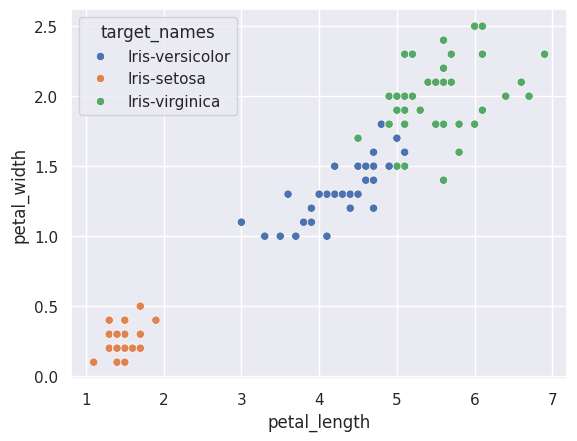

In [162]:
sns.scatterplot(x="petal_length",y="petal_width",data=df_predictions,hue="target_names")

<Axes: xlabel='petal_length', ylabel='petal_width'>

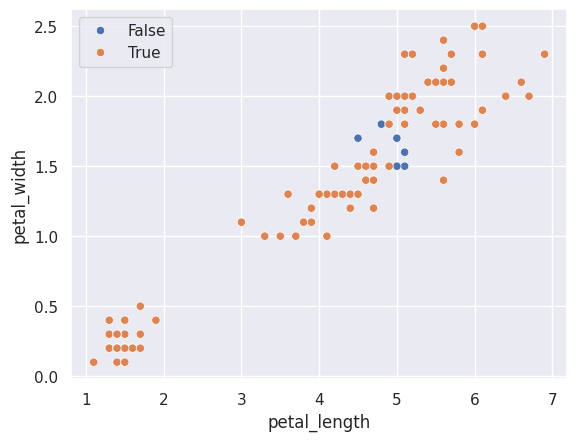

In [163]:
sns.scatterplot(x="petal_length",y="petal_width",data=df_predictions,hue=predicted_corrected_mask)

# Model Tuning
what is model tuning?
Model tuning is trying to determine the parameters of your model (ther are also known as "hyperparameters") that maximize the model performance

In [177]:
model_tuned = LogisticRegression(max_iter=200, C=6) 

 C : float, default=1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.

In [183]:
accuracies = cross_val_score(model_tuned, X_train, y_train, cv=5, scoring="accuracy")

In [184]:
print(f"Accuracy : {np.mean(accuracies) * 100:.2f}%")

Accuracy : 94.70%


In [186]:
for reg_params in (0.1,0.3,0.9,1,1.3,1.9,2): 
    print(reg_params)
    model_tuned = LogisticRegression(max_iter=200, C=reg_params) 
    accuracies = cross_val_score(model_tuned, X_train, y_train, cv=5, scoring="accuracy")
    print(f"Accuracy : {np.mean(accuracies) * 100:.2f}%")

0.1
Accuracy : 91.11%
0.3
Accuracy : 93.83%
0.9
Accuracy : 93.79%
1
Accuracy : 93.79%
1.3
Accuracy : 93.79%
1.9
Accuracy : 94.70%
2
Accuracy : 94.70%


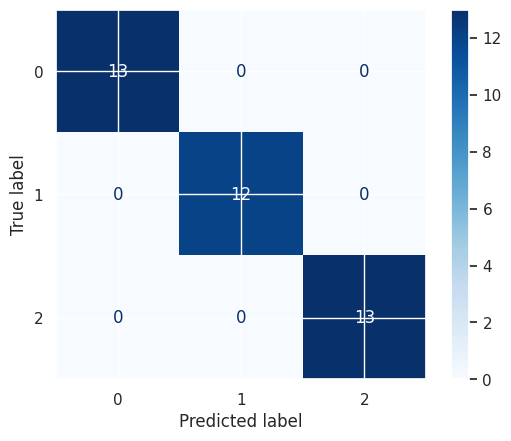

In [189]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model_tuned.fit(X_train, y_train)

# Predict on test data
y_pred = model_tuned.predict(X_test)

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Using a blue color map for better visualization
plt.show()

In [190]:
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])